In [113]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import datetime

import pandas as pd

url = "https://raw.githubusercontent.com/tmoura/machinelearning/master/datasets/iris.data"
url1 = "Diabetes-Data/data-01"

url2 = "adult.data"


# Carregar base de dados
# DataFrame
dataset = pd.read_csv(url1, header=None, sep='\t')
dataset


,0,1,2,3
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7
...,...,...,...,...
938,09-02-1991,17:30,33,7
939,09-02-1991,23:00,48,155
940,09-03-1991,7:20,58,110
941,09-03-1991,7:20,33,9


In [96]:
dataset.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]

In [10]:

# tratamento dos dados 
#Foi necessário transformar a coluna 1, que é hora em string para minutos.
# def convert(data):
#     hora,minuto = data.split(':')
#     total = (int(hora)*60) + int(minuto)
#     return total

# dataset[1] = dataset[1].apply(convert)



In [97]:
columns = len(dataset.columns)
y = dataset["class"]
dataset.drop("class", axis=1, inplace=True) # extrai a primeira coluna, que é o label
X = dataset

In [108]:
X = X[["age", "education-num", "hours-per-week"]]
X

,education-num,hours-per-week
0,13,40
1,13,13
2,9,40
3,7,40
4,13,40
...,...,...
32556,12,38
32557,9,40
32558,9,40
32559,9,20


In [103]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: class, Length: 32561, dtype: object

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None) # 80% treino e 20% teste

In [110]:
# Treinamendo da Árvore de Decisão
#model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=2)
model = tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [111]:
# Predição e Resultados

result = model.predict(X_test)
acc = metrics.accuracy_score(result, y_test)
show = round(acc * 100)
print("{}%".format(show))

print(list(result))
print(list(y_test))

79%
[' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' >50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' >50K', ' >50K', ' >50K', ' <=50K', ' <=50K', ' >50K', ' >50K', ' >50K', ' >50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' >50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50

[Text(0.2929941552618007, 0.984375, 'x[0] <= 27.5\nentropy = 0.796\nsamples = 26048\nvalue = [19779, 6269]'),
 Text(0.027867268041237115, 0.953125, 'x[0] <= 23.5\nentropy = 0.203\nsamples = 6451\nvalue = [6246, 205]'),
 Text(0.005306959841262994, 0.921875, 'x[2] <= 39.5\nentropy = 0.061\nsamples = 3824\nvalue = [3797, 27]'),
 Text(0.0006901608937583575, 0.890625, 'x[2] <= 31.0\nentropy = 0.006\nsamples = 2073\nvalue = [2072, 1]'),
 Text(0.00034508044687917873, 0.859375, 'entropy = 0.0\nsamples = 1710\nvalue = [1710, 0]'),
 Text(0.001035241340637536, 0.859375, 'x[2] <= 32.5\nentropy = 0.027\nsamples = 363\nvalue = [362, 1]'),
 Text(0.0006901608937583575, 0.828125, 'x[0] <= 21.5\nentropy = 0.154\nsamples = 45\nvalue = [44, 1]'),
 Text(0.00034508044687917873, 0.796875, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.001035241340637536, 0.796875, 'x[0] <= 22.5\nentropy = 0.371\nsamples = 14\nvalue = [13, 1]'),
 Text(0.0006901608937583575, 0.765625, 'x[1] <= 11.5\nentropy = 0.722\n

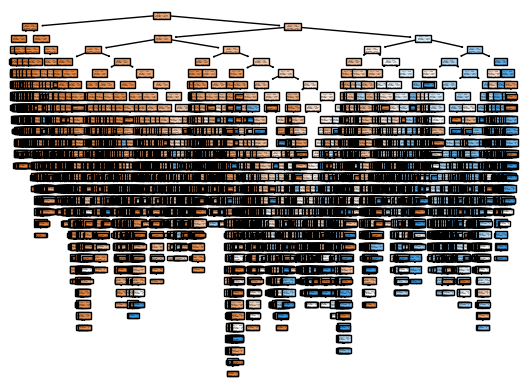

In [107]:
tree.plot_tree(model, filled=True)